## Event Analysis for Altcoins

In [2]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read data into dataframes

df_doge=pd.read_csv("C:\\Users\\palla\\Downloads\\crypto\\Event Analysis\\coin_Dogecoin.csv")
df_eth=pd.read_csv("C:\\Users\\palla\\Downloads\\crypto\\Event Analysis\\coin_Ethereum.csv")
df_av=pd.read_csv("C:\\Users\\palla\\Downloads\\crypto\\Event Analysis\\coin_Aave.csv")

In [4]:
# Getting the average price in a day for Doge, Ethereum and Aave

df_doge['price_in_day'] = (df_doge['Close']+df_doge["Open"])/2
df_eth['price_in_day'] = (df_eth['Close']+df_eth["Open"])/2
df_av['price_in_day'] = (df_av['Close']+df_av["Open"])/2

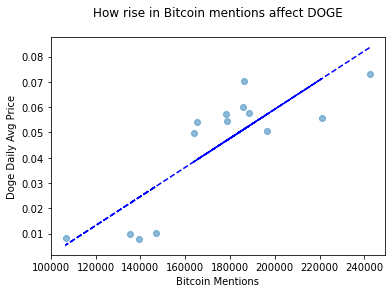

In [5]:
# Relation - Bitcoin mentions vs Doge Price

df2_doge=df_doge[df_doge.event_occur==1]
plt.scatter(df2_doge['mention_volume'], df2_doge['price_in_day'], alpha=0.5)
z = np.polyfit(df2_doge['mention_volume'], df2_doge['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df2_doge['mention_volume'],p(df2_doge['mention_volume']),"b--")
plt.xlabel('Bitcoin Mentions')
plt.ylabel('Doge Daily Avg Price')
plt.title('How rise in Bitcoin mentions affect DOGE\n')
plt.show()

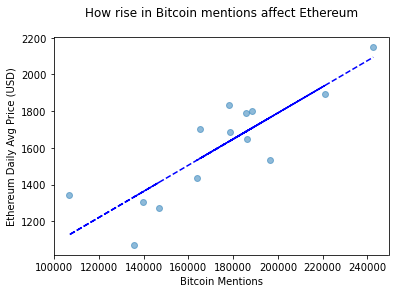

In [6]:
# Relation - Bitcoin mentions vs Ethereum Price

df2_eth=df_eth[df_eth.event_occur==1]
plt.scatter(df2_eth['mention_volume'], df2_eth['price_in_day'], alpha=0.5)
z = np.polyfit(df2_eth['mention_volume'], df2_eth['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df2_eth['mention_volume'],p(df2_eth['mention_volume']),"b--")
plt.xlabel('Bitcoin Mentions')
plt.ylabel('Ethereum Daily Avg Price (USD)')
plt.title('How rise in Bitcoin mentions affect Ethereum\n')
plt.show()

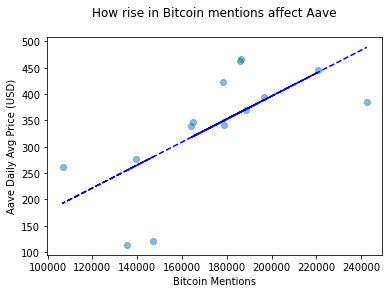

In [10]:
# Relation - Bitcoin mentions vs Aave Price

df2_av=df_av[df_av.event_occur==1]
plt.scatter(df2_av['mention_volume'], df2_av['price_in_day'], alpha=0.5)
z = np.polyfit(df2_av['mention_volume'], df2_av['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df2_av['mention_volume'],p(df2_av['mention_volume']),"b--")
plt.xlabel('Bitcoin Mentions')
plt.ylabel('Aave Daily Avg Price (USD)')
plt.title('How rise in Bitcoin mentions affect Aave\n')
plt.show()

### Dogecoin Analysis: 

In [7]:
# Retrieve the event days

def fun(df_doge,i):
    m=0
    index=0
    for j in range(i,i+2):
        diff=abs(df_doge['mention_volume'][j-1]-df_doge['mention_volume'][j])
        
        if(diff>m):
            index=j
        m=max(diff,m)
       
    return(index)
    
list_of_days_doge=[]    
for i in range(len(df_doge)):
    if df_doge['event_occur'][i]==1:
        print(df_doge['event_name'][i])
        j=fun(df_doge,i)
        list_of_days_doge.append(j)

list_of_days_doge

jp morgan positive valuation
crypto downnnnn
regulators lack of confidence
Musk tweeting #bitcoin
Tesla taps in for a big-time bounce
Bitcoin breaks $50k!
Bitcoin breaks $1 trillion
Cboe might list Bitcoin
PayPal moves into Bitcoin
Confiscated bitcoin auction
Morgan Stanley offers bitcoin access
Bitcoins now buy Teslas
VISA allows USD coin for transactions
Coinbase goes public


[5, 10, 26, 27, 38, 46, 49, 59, 62, 69, 75, 82, 87, 102]

In [13]:
# Set the peak and Valley index for Dogecoin. 
# Peak - Highest mention volumes
# Valley - Lowest Mention volumes

def peaks_valleys(df_doge):
    peaks_doge=[]
    valleys_doge=[]
    index_doge=0
    for i in range(1,len(df_doge)-1):
        if((df_doge['mention_volume'][i]-df_doge['mention_volume'][i-1])>=.2*df_doge['mention_volume'][i-1]):
            if((df_doge['mention_volume'][i]-df_doge['mention_volume'][i+1])>=0):
                index_doge=i
                if index_doge not in peaks_doge:
                    peaks_doge.append(index_doge)
        if((df_doge['mention_volume'][i-1]-df_doge['mention_volume'][i])>=0.20*df_doge['mention_volume'][i-1]):
            if((df_doge['mention_volume'][i+1]-df_doge['mention_volume'][i])>=0):
                index_doge=i
                if index_doge not in valleys_doge:
                    valleys_doge.append(index_doge)
                       
                            
    return(peaks_doge,valleys_doge)
peaks_doge,valleys_doge=peaks_valleys(df_doge)

peaks_doge,valleys_doge

([1, 6, 10, 20, 24, 28, 31, 35, 38, 50, 53, 59, 71, 75, 82, 89, 94, 107, 115],
 [11, 19, 22, 30, 36, 43, 48, 72, 78, 106, 113])

In [14]:
df_doge['spike']=0
df_doge['peak']=0
df_doge['valley']=0

for i in peaks_doge:
    df_doge['peak'][i]=1
for i in valleys_doge:
    df_doge['valley'][i]=1
for i in peaks_doge+valleys_doge:
    df_doge['spike'][i]=1

<ipython-input-14-f31ef3ca8796>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doge['peak'][i]=1
<ipython-input-14-f31ef3ca8796>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doge['valley'][i]=1
<ipython-input-14-f31ef3ca8796>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doge['spike'][i]=1


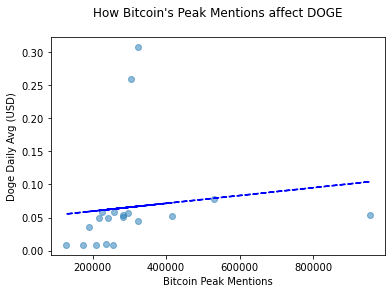

In [15]:
# Relation - Bitcoin Peak Mentions vs Dogecoin prices

df_doge_new = df_doge[df_doge.peak == 1]
plt.scatter(df_doge_new['mention_volume'], df_doge_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_doge_new['mention_volume'], df_doge_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_doge_new['mention_volume'],p(df_doge_new['mention_volume']),"b--")

plt.xlabel('Bitcoin Peak Mentions')
plt.ylabel('Doge Daily Avg (USD)')
plt.title("How Bitcoin's Peak Mentions affect DOGE\n")
plt.show()

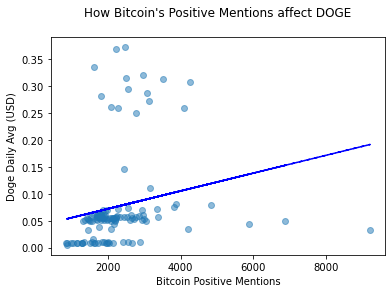

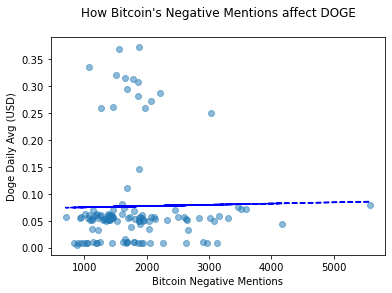

In [16]:
#Doge Positive sentiment

df_doge_new = df_doge

plt.scatter(df_doge_new['positive_volume'], df_doge_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_doge_new['positive_volume'], df_doge_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_doge_new['positive_volume'],p(df_doge_new['positive_volume']),"b--")

plt.xlabel('Bitcoin Positive Mentions')
plt.ylabel('Doge Daily Avg (USD)')
plt.title("How Bitcoin's Positive Mentions affect DOGE\n")
plt.show()

#Doge Negative sentiment

df_doge_new = df_doge

plt.scatter(df_doge_new['negative_volume'], df_doge_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_doge_new['negative_volume'], df_doge_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_doge_new['negative_volume'],p(df_doge_new['negative_volume']),"b--")

plt.xlabel('Bitcoin Negative Mentions')
plt.ylabel('Doge Daily Avg (USD)')
plt.title("How Bitcoin's Negative Mentions affect DOGE\n")
plt.show()

### Ethereum Analysis:

In [82]:
# Retrieve the event days

def fun(df_eth,i):
    m=0
    index=0
    for j in range(i,i+2):
        diff=abs(df_eth['mention_volume'][j-1]-df_eth['mention_volume'][j])
        
        if(diff>m):
            index=j
        m=max(diff,m)
       
    return(index)
    
list_of_days_eth=[]    
for i in range(len(df_eth)):
    if df_eth['event_occur'][i]==1:
        print(df_eth['event_name'][i])
        j=fun(df_eth,i)
        list_of_days_eth.append(j)

list_of_days_eth

jp morgan positive valuation
crypto downnnnn
regulators lack of confidence
Musk tweeting #bitcoin
Tesla taps in for a big-time bounce
Bitcoin breaks $50k!
Bitcoin breaks $1 trillion
Cboe might list Bitcoin
PayPal moves into Bitcoin
Confiscated bitcoin auction
Morgan Stanley offers bitcoin access
Bitcoins now buy Teslas
VISA allows USD coin for transactions
Coinbase goes public


[5, 10, 26, 27, 38, 46, 49, 59, 62, 69, 75, 82, 87, 102]

In [83]:
# Set the peak and Valley index for Ethereum. 
# Peak - Highest mention volumes
# Valley - Lowest Mention volumes

def peaks_valleys(df_eth):
    peaks_eth=[]
    valleys_eth=[]
    index_eth=0
    for i in range(1,len(df_eth)-1):
        if((df_eth['mention_volume'][i]-df_eth['mention_volume'][i-1])>=.2*df_eth['mention_volume'][i-1]):
            if((df_eth['mention_volume'][i]-df_eth['mention_volume'][i+1])>=0):
                index_eth=i
                if index_eth not in peaks_eth:
                    peaks_eth.append(index_eth)
        if((df_eth['mention_volume'][i-1]-df_eth['mention_volume'][i])>=0.20*df_eth['mention_volume'][i-1]):
            if((df_eth['mention_volume'][i+1]-df_eth['mention_volume'][i])>=0):
                index_eth=i
                if index_eth not in valleys_eth:
                    valleys_eth.append(index_eth)
                       
                            
    return(peaks_eth,valleys_eth)
peaks_eth,valleys_eth=peaks_valleys(df_eth)

peaks_eth,valleys_eth

([1, 6, 10, 20, 24, 28, 31, 35, 38, 50, 53, 59, 71, 75, 82, 89, 94, 107, 115],
 [11, 19, 22, 30, 36, 43, 48, 72, 78, 106, 113])

In [84]:
df_eth['spike']=0
df_eth['peak']=0
df_eth['valley']=0

for i in peaks_eth:
    df_eth['peak'][i]=1
for i in valleys_eth:
    df_eth['valley'][i]=1
for i in peaks_eth+valleys_eth:
    df_eth['spike'][i]=1

<ipython-input-84-7b6e6ad0c727>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eth['peak'][i]=1
<ipython-input-84-7b6e6ad0c727>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eth['valley'][i]=1
<ipython-input-84-7b6e6ad0c727>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eth['spike'][i]=1


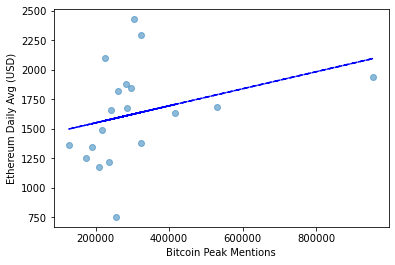

In [85]:
# Relation - Bitcoin Peak Mentions vs Ethereum prices

df_eth_new = df_eth[df_eth.peak == 1]
plt.scatter(df_eth_new['mention_volume'], df_eth_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_eth_new['mention_volume'], df_eth_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_eth_new['mention_volume'],p(df_eth_new['mention_volume']),"b--")

plt.xlabel('Bitcoin Peak Mentions')
plt.ylabel('Ethereum Daily Avg (USD)')
plt.show()

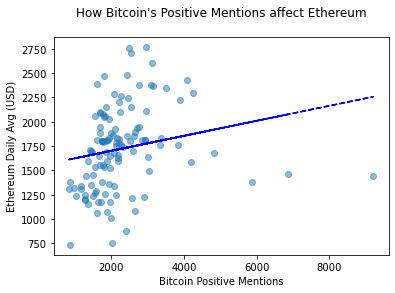

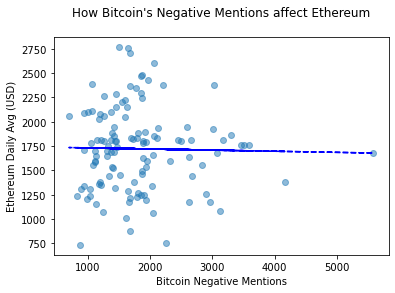

In [17]:
#Ethereum Positive sentiment

df_eth_new = df_eth

plt.scatter(df_eth_new['positive_volume'], df_eth_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_eth_new['positive_volume'], df_eth_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_eth_new['positive_volume'],p(df_eth_new['positive_volume']),"b--")

plt.xlabel('Bitcoin Positive Mentions')
plt.ylabel('Ethereum Daily Avg (USD)')
plt.title("How Bitcoin's Positive Mentions affect Ethereum\n")
plt.show()

#Ethereum Negative sentiment

df_eth_new = df_eth

plt.scatter(df_eth_new['negative_volume'], df_eth_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_eth_new['negative_volume'], df_eth_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_eth_new['negative_volume'],p(df_eth_new['negative_volume']),"b--")

plt.xlabel('Bitcoin Negative Mentions')
plt.ylabel('Ethereum Daily Avg (USD)')
plt.title("How Bitcoin's Negative Mentions affect Ethereum\n")
plt.show()

### Aave Analysis:

In [88]:
# Retrieve the event days

def fun(df_av,i):
    m=0
    index=0
    for j in range(i,i+2):
        diff=abs(df_av['mention_volume'][j-1]-df_av['mention_volume'][j])
        
        if(diff>m):
            index=j
        m=max(diff,m)
       
    return(index)
    
list_of_days_av=[]    
for i in range(len(df_av)):
    if df_av['event_occur'][i]==1:
        print(df_av['event_name'][i])
        j=fun(df_av,i)
        list_of_days_av.append(j)

list_of_days_av

jp morgan positive valuation
crypto downnnnn
regulators lack of confidence
Musk tweeting #bitcoin
Tesla taps in for a big-time bounce
Bitcoin breaks $50k!
Bitcoin breaks $1 trillion
Cboe might list Bitcoin
PayPal moves into Bitcoin
Confiscated bitcoin auction
Morgan Stanley offers bitcoin access
Bitcoins now buy Teslas
VISA allows USD coin for transactions
Coinbase goes public


[5, 10, 26, 27, 38, 46, 49, 59, 62, 69, 75, 82, 87, 102]

In [91]:
# Set the peak and Valley index for Aave. 
# Peak - Highest mention volumes
# Valley - Lowest Mention volumes

def peaks_valleys(df_av):
    peaks_av=[]
    valleys_av=[]
    index_av=0
    for i in range(1,len(df_av)-1):
        if((df_av['mention_volume'][i]-df_av['mention_volume'][i-1])>=.2*df_av['mention_volume'][i-1]):
            if((df_av['mention_volume'][i]-df_av['mention_volume'][i+1])>=0):
                index_av=i
                if index_av not in peaks_av:
                    peaks_av.append(index_av)
        if((df_av['mention_volume'][i-1]-df_av['mention_volume'][i])>=0.20*df_av['mention_volume'][i-1]):
            if((df_av['mention_volume'][i+1]-df_av['mention_volume'][i])>=0):
                index_av=i
                if index_av not in valleys_av:
                    valleys_av.append(index_av)
                       
                            
    return(peaks_av,valleys_av)
peaks_av,valleys_av=peaks_valleys(df_av)

peaks_av,valleys_av

([1, 6, 10, 20, 24, 28, 31, 35, 38, 50, 53, 59, 71, 75, 82, 89, 94, 107, 115],
 [11, 19, 22, 30, 36, 43, 48, 72, 78, 106, 113])

In [92]:
df_av['spike']=0
df_av['peak']=0
df_av['valley']=0

for i in peaks_av:
    df_av['peak'][i]=1
for i in valleys_av:
    df_av['valley'][i]=1
for i in peaks_av+valleys_av:
    df_av['spike'][i]=1

<ipython-input-92-8a822eee696d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_av['peak'][i]=1
<ipython-input-92-8a822eee696d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_av['valley'][i]=1
<ipython-input-92-8a822eee696d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_av['spike'][i]=1


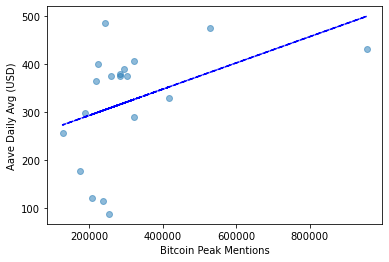

In [93]:
# Relation - Bitcoin Peak Mentions vs Aave prices

df_av_new = df_av[df_av.peak == 1]
plt.scatter(df_av_new['mention_volume'], df_av_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_av_new['mention_volume'], df_av_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_av_new['mention_volume'],p(df_av_new['mention_volume']),"b--")

plt.xlabel('Bitcoin Peak Mentions')
plt.ylabel('Aave Daily Avg (USD)')
plt.show()

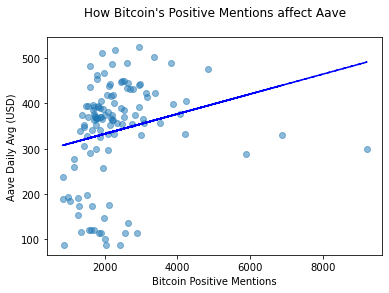

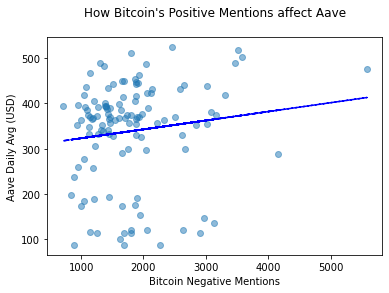

In [18]:
#Aave Positive sentiment

df_av_new = df_av

plt.scatter(df_av_new['positive_volume'], df_av_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_av_new['positive_volume'], df_av_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_av_new['positive_volume'],p(df_av_new['positive_volume']),"b--")

plt.xlabel('Bitcoin Positive Mentions')
plt.ylabel('Aave Daily Avg (USD)')
plt.title("How Bitcoin's Positive Mentions affect Aave\n")
plt.show()

#Aave Negative sentiment

df_av_new = df_av

plt.scatter(df_av_new['negative_volume'], df_av_new['price_in_day'], alpha=0.5)
z = np.polyfit(df_av_new['negative_volume'], df_av_new['price_in_day'], 1)
p = np.poly1d(z)
plt.plot(df_av_new['negative_volume'],p(df_av_new['negative_volume']),"b--")

plt.xlabel('Bitcoin Negative Mentions')
plt.ylabel('Aave Daily Avg (USD)')
plt.title("How Bitcoin's Positive Mentions affect Aave\n")
plt.show()